<h1>Logistic Regression</h1>

Logistic Regression is a statistical method used in machine learning to predict the positive or negative value of a dependent variable based on one or more independent variables. In Logistic Regression, the dependent variable is modeled using the logistic function, which maps continuous inputs to a binary output.

The Logistic Regression model estimates the coefficients of the independent variables that maximise the likelihood of the observed data given the model parameters. The model is trained to minimise the difference between the predicted probabilities and the actual binary outcomes of the data. A threshold can also be set on the predicted probabilities. Any probability greater than the threshold is classified as positive and any probability less than the threshold is classified as negative.

Since our predictor variable is a categorical variable and our data set contains mostly categorical variables with 4 numeric and 7 categorical independent variables, a Logistic Regression model is ideal compared to a Linear Regression model which predicts a numeric output. Finally, Logistic Regression can handle large datasets similar to ours with many predictor variables and observations.

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
# Loading cleaned data set
hypertension = pd.read_csv('hypertension.csv')
hypertension.head()

,Unnamed: 0,_TOTINDA,_BMI5,DROCDY3_,AVEDRNK3,_RFBING5,CHOLMED3,FRNCHDA_,FRUTDA2_,FTJUDA2_,...,DIABETE4,_RFCHOL3,_MICHD,_EDUCAG,_CASTHM1,_RFSMOK3,_DRDXAR3,_IMPRACE,_AGE80,AlchoIntake
0,3,Yes,33.47,14.0,3.0,Yes,No,0.57,0.71,71.0,...,Yes,Yes,No,Graduated High School,No,No,No,White,62.0,2.94
1,9,Yes,39.94,10.0,2.0,No,Yes,0.29,0.57,0.0,...,No,No,No,Graduated High School,No,No,Yes,White,65.0,1.40
2,22,No,35.87,13.0,2.0,No,Yes,0.13,0.20,3.0,...,No,Yes,No,Graduated High School,No,Yes,No,White,68.0,1.82
3,49,Yes,22.24,3.0,1.0,No,Yes,0.14,0.71,0.0,...,Yes,Yes,Yes,Graduated High School,No,No,Yes,White,77.0,0.21
4,54,No,25.79,10.0,1.0,No,No,0.29,0.29,13.0,...,No,Yes,No,Attended College or Technical School,No,No,Yes,White,80.0,0.70


<h1>Variables</h1>

From our Exploratory Data Analysis, a total of 4 numeric and 7 categorical variables that are significantly correlated with hypertension were identified. For Logistic Regression, categorical values (strings) have to be converted into numerical values to be processed.

In [3]:
# Creating dataframe with only significant independent variables
hypertension_dataset = pd.DataFrame(hypertension[['_TOTINDA','_BMI5','AlchoIntake','CHOLMED3','_RFHYPE6','DIABETE4','_RFCHOL3','_MICHD','_EDUCAG','_DRDXAR3','_AGE80']])
hypertension_dataset.head()

,_TOTINDA,_BMI5,AlchoIntake,CHOLMED3,_RFHYPE6,DIABETE4,_RFCHOL3,_MICHD,_EDUCAG,_DRDXAR3,_AGE80
0,Yes,33.47,2.94,No,Yes,Yes,Yes,No,Graduated High School,No,62.0
1,Yes,39.94,1.40,Yes,Yes,No,No,No,Graduated High School,Yes,65.0
2,No,35.87,1.82,Yes,Yes,No,Yes,No,Graduated High School,No,68.0
3,Yes,22.24,0.21,Yes,Yes,Yes,Yes,Yes,Graduated High School,Yes,77.0
4,No,25.79,0.70,No,Yes,No,Yes,No,Attended College or Technical School,Yes,80.0


In [4]:
# Changing categorical 'yes'/'no' to numeric values for Logistic Regression
hypertension_dataset.replace("Yes", 1, inplace = True)
hypertension_dataset.replace("No", 0, inplace = True)

In [5]:
# Decode _EDUCAG
hypertension_dataset.replace("Did not graduate High School", 1, inplace = True)
hypertension_dataset.replace("Graduated High School", 2, inplace = True)
hypertension_dataset.replace("Attended College or Technical School", 3, inplace = True)
hypertension_dataset.replace("Graduated from College or Technical School", 4, inplace = True)

In [6]:
# Check if variable data has been changed to type int
hypertension_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93403 entries, 0 to 93402
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _TOTINDA     93403 non-null  int64  
 1   _BMI5        93403 non-null  float64
 2   AlchoIntake  93403 non-null  float64
 3   CHOLMED3     93403 non-null  int64  
 4   _RFHYPE6     93403 non-null  int64  
 5   DIABETE4     93403 non-null  int64  
 6   _RFCHOL3     93403 non-null  int64  
 7   _MICHD       93403 non-null  int64  
 8   _EDUCAG      93403 non-null  int64  
 9   _DRDXAR3     93403 non-null  int64  
 10  _AGE80       93403 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 7.8 MB


In [7]:
# Rename the reponse variable column to "Hypertension" to make it more intuitive
hypertension_dataset.rename(columns={"_RFHYPE6": "Hypertension"}, inplace=True) 

# Isolate dependent variable to fit into the model
labels = hypertension_dataset.pop("Hypertension")

<h1>Train and Test Set</h1>

Our data set will be randomly split into two sets with 75% of the data forming the train set and the remaining 25% forming the test set.

The train set will be fitted into the parameters of Logistic Regression where the coefficients of the model are adjusted to minimise the difference between the predicted and the actual values for hypertension based on the given independent variables.

The test set is then used to evaluate the performance of the trained model to simulate how well the model can make predictions for hypertension on new and unseen data.

The train and test sets are kept completely separate to avoid overfitting the model to the train data. Overfitting occurs when the model makes predictions based on memory of data in the train set rather than trends, which causes it to perform poorly on new data. By evaluating the performance of the model on a separate test set, a better estimate is returned.

In [8]:
# Split data randomly into 75% train set and 25% test set
x_train, x_test, y_train, y_test = train_test_split(hypertension_dataset, labels, test_size = 0.25)

In [9]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression(max_iter=100000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=100000)

In [10]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[-0.135918    0.09297924  0.0294223   0.59427305  0.64529688  0.382973
   0.63733095 -0.12736125  0.21814133  0.03896373]]
[-5.46779764]


In [11]:
# Perform prediction using the train dataset
y_train_pred = log_reg.predict(x_train)

In [12]:
# Perform prediction using the test dataset
y_test_pred = log_reg.predict(x_test)

<h1>Confusion Matrix</h1>

The confusion matrix allows us to evaluate the performance of a classification model by summarising the predicted and actual values of the test data to determine the accuracy of its predictions.

The TPR can be found by dividing the true positives identified by the total actual positives. The FPR can be found by divding the false positives identified by the total actual negatives. Comparing the TPR and FPR gives us an indication of how well the model can correctly identify whether an individual has hypertension based on the individual's factors.

For Logistic Regression, the accuracy of the model can be determined by how well the model is able to correctly identify its predictions. This can be found by dividing the sum of true positives and true negatives by the total number of predictions, which gives us the rate of correct predictions on the test set.

<AxesSubplot:>

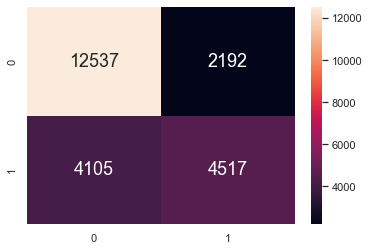

In [13]:
# Show the Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [14]:
# Check the Goodness of Fit (on Train Data)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()

tpr_train = tp_train / (fn_train + tp_train)
fpr_train = fp_train / (fp_train + tn_train)
accuracy_train = (tp_train + tn_train)/(tp_train + tn_train + fp_train + fn_train)
print("Goodness of Fit of Model \t:Train Dataset")
print("True positive rate \t=", tpr_train)
print("False positive rate \t=", fpr_train)
print("Accuracy of train \t=", accuracy_train)

print()
# Check the Goodness of Fit (on Test Data)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

tpr_test = tp_test / (fn_test + tp_test)
fpr_test = fp_test / (fp_test + tn_test)
accuracy_test = (tp_test + tn_test)/(tp_test + tn_test + fp_test + fn_test)
print("Goodness of Fit of Model \t:Test Dataset")
print("True positive rate \t=", tpr_test)
print("False positive rate \t=", fpr_test)
print("Accuracy of test \t=", accuracy_test)

Goodness of Fit of Model 	:Train Dataset
True positive rate 	= 0.5299297134471306
False positive rate 	= 0.15526065492096564
Accuracy of train 	= 0.7283732084737052

Goodness of Fit of Model 	:Test Dataset
True positive rate 	= 0.5238923683600093
False positive rate 	= 0.14882205173467308
Accuracy of test 	= 0.7303327480621815


<h1>Hyperparameter Optimisation</h1>

The Logistic Regression model can be further optimised by setting certain parameters that are not learned from the data. These parameters are known as hyperparameters. Using GridSearch, the most suitable hyperparameters for the model can be found by trial and error to find the best values.

The hyperparameters we considered are:

1. <b>C</b>: The strength of the regularisation applied to the model. Regularisation helps to prevent overfitting by penalising large coefficients in the model. A high value of C reduces the amount of regularisation and may lead to overfitting, while a low value of C increases the regularisation and may lead to underfitting. A range of C values from 0.1 to 1 will be tested to ensure sufficient breadth and low C value.


2. <b>penalty</b>: There are two penalty hyperparameters L1 (Lasso) and L2 (Ridge). L1 is used to reduce the number of input variables, while L2 is used when all the variables are important and we want to avoid overfitting. Since we have identified only the variables with significant correlation to hypertension, only L2 penalty will be used.


3. <b>solver</b>: There are different solvers that can be used to optimise the Logistic Regression model. The choice of solver can affect the convergence speed and accuracy of the model. "lbfgs" is used for its good convergence properties, efficient use of memory, and ability to handle large datasets. "sag" optimises the loss function by updating the coefficients based on a randomly selected subset of the training datawill be tested, and is efficient for large datasets. These two solvers are suitable as our dataset with over 70,000 data points is considered large.


4. <b>max_iter</b>: The max number of iterations needed for the Logistic Regression to converge and produce an accurate solution. A sufficiently large value for the max iteration hyperparameter is needed to ensure that the algorithm has enough time to converge. However, a value too large can cause performance or computational issues, and hence an optimal number of iterations is needed.

In [22]:
# Specify the chosen hyperparameters for the Logistic Regression
param_grid = [    
    {'penalty' : ['l2'],
    'C' : np.arange(0.1, 1.0, 0.1),
    'solver' : ['lbfgs','sag'],
    'max_iter' : [500, 1000, 5000, 10000]
    }
]

In [23]:
# Grid search builds a model for every combination of the hyperparameters specified and evaluates each model
# This gives us a comprehensive evaluation of the best hyperparameters to optimise prediction accuracy
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(log_reg, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [24]:
# clf is used to store trained model values and find the best hyperparameter fit
best_clf = clf.fit(x_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


In [25]:
# Find the best hyperparameters
best_clf.best_estimator_

LogisticRegression(C=0.9, max_iter=500)

<h1>Final Logistic Regression Model</h1>

We will fit the Logistic Regression model using the best hyperparameters (C=0.9, max_iter=500) to create our final model. The confusion matrix will be generated again and compared with the previous confusion matrix to identify if the new model is able to identify the test data more accurately. Finally, the accuracy of the old and new model will be compared to see if there is any significant improvement to the prediction accuracy after optimisation.

In [26]:
# Fit logistic regression model with best hyperparameters
log_reg = LogisticRegression(C=0.9, max_iter=500)
log_reg.fit(x_train, y_train)

LogisticRegression(C=0.9, max_iter=500)

<AxesSubplot:>

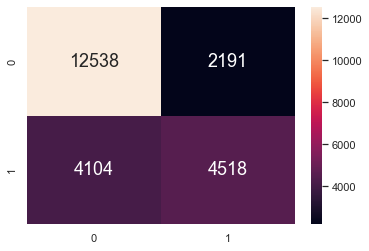

In [27]:
# Perform prediction using the train dataset
y_train_pred = log_reg.predict(x_train)

# Perform prediction using the test dataset
y_test_pred = log_reg.predict(x_test)

# Show the Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [28]:
# Check the Goodness of Fit (on Train Data)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()

tpr_train = tp_train / (fn_train + tp_train)
fpr_train = fp_train / (fp_train + tn_train)
accuracy_train = (tp_train + tn_train)/(tp_train + tn_train + fp_train + fn_train)
print("Goodness of Fit of Model \t:Train Dataset")
print("True positive rate \t=", tpr_train)
print("False positive rate \t=", fpr_train)
print("Accuracy of train \t=", accuracy_train)

print()
# Check the Goodness of Fit (on Test Data)
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_test_pred).ravel()

tpr_test = tp_test / (fn_test + tp_test)
fpr_test = fp_test / (fp_test + tn_test)
accuracy_test = (tp_test + tn_test)/(tp_test + tn_test + fp_test + fn_test)
print("Goodness of Fit of Model \t:Test Dataset")
print("True positive rate \t=", tpr_test)
print("False positive rate \t=", fpr_test)
print("Accuracy of test \t=", accuracy_test)

Goodness of Fit of Model 	:Train Dataset
True positive rate 	= 0.5300841893875029
False positive rate 	= 0.15530594682730195
Accuracy of train 	= 0.728401758693542

Goodness of Fit of Model 	:Test Dataset
True positive rate 	= 0.524008350730689
False positive rate 	= 0.14875415846289633
Accuracy of test 	= 0.7304183974990365


<h1>Final Prediction Accuracy</h1>

The initial TPR (0.52389) of the test set and FPR (0.14882) has been improved in the final TPR (0.52401) and FPR (0.14875). There is an increase in TPR by 0.00012 and a decrease in FPR by 0.00007. Prediction accuracy on the test set has also improved from 0.73033 to 0.73042 by 0.00011. This means that after optimisation, the model is able to correctly identify more true positives and true negatives with greater accuracy. 

However, this is only a slight improvement and the tradeoff in computational power required does not justify the optimisation value. Our initial model is already good enough as it has a high prediction accuracy. Our final Logistic Regression model can correctly identify individuals with hypertension and individuals without hypertension 73.0% of the time.